In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(context='notebook', style='white', rc={'figure.figsize':(14,10)})

In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target,
                                                    stratify=digits.target,
                                                    random_state=42)

In [5]:
svc = SVC().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)


In [6]:
svc.score(X_test, y_test), knn.score(X_test, y_test)


(0.9911111111111112, 0.9844444444444445)

In [7]:
import umap

In [8]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_train)

c:\Users\blais\Documents\ML\venv2\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [11]:
import umap.plot

c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaW

<AxesSubplot:>

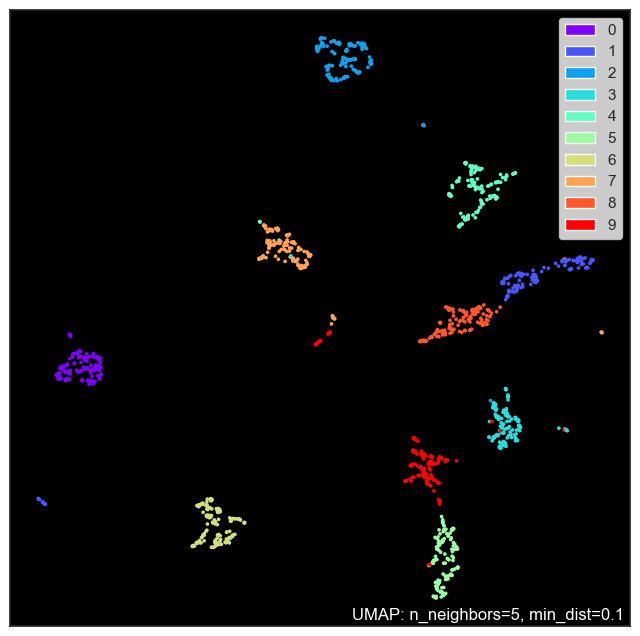

In [15]:
umap.plot.points(trans,labels=y_train, theme='fire')

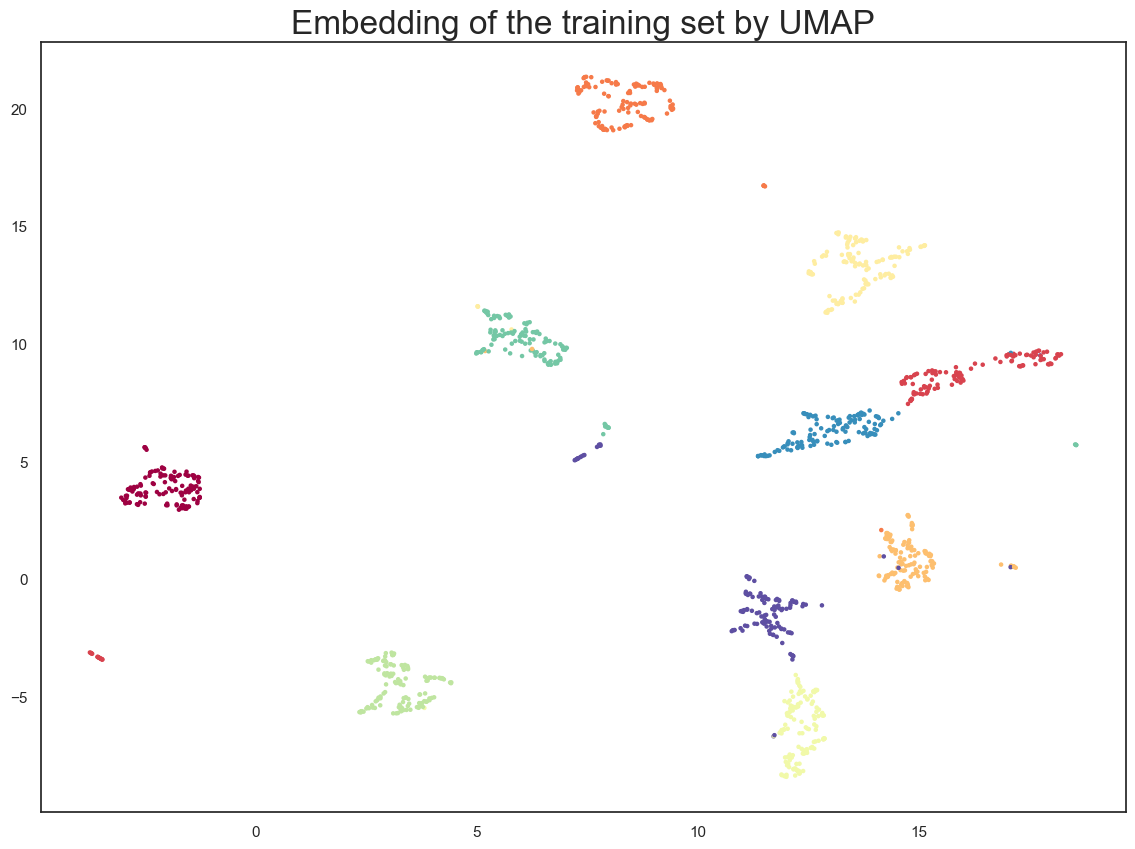

In [9]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

Now - training the classifiers on the embedding training data 

In [16]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [17]:
test_embedding = trans.transform(X_test)

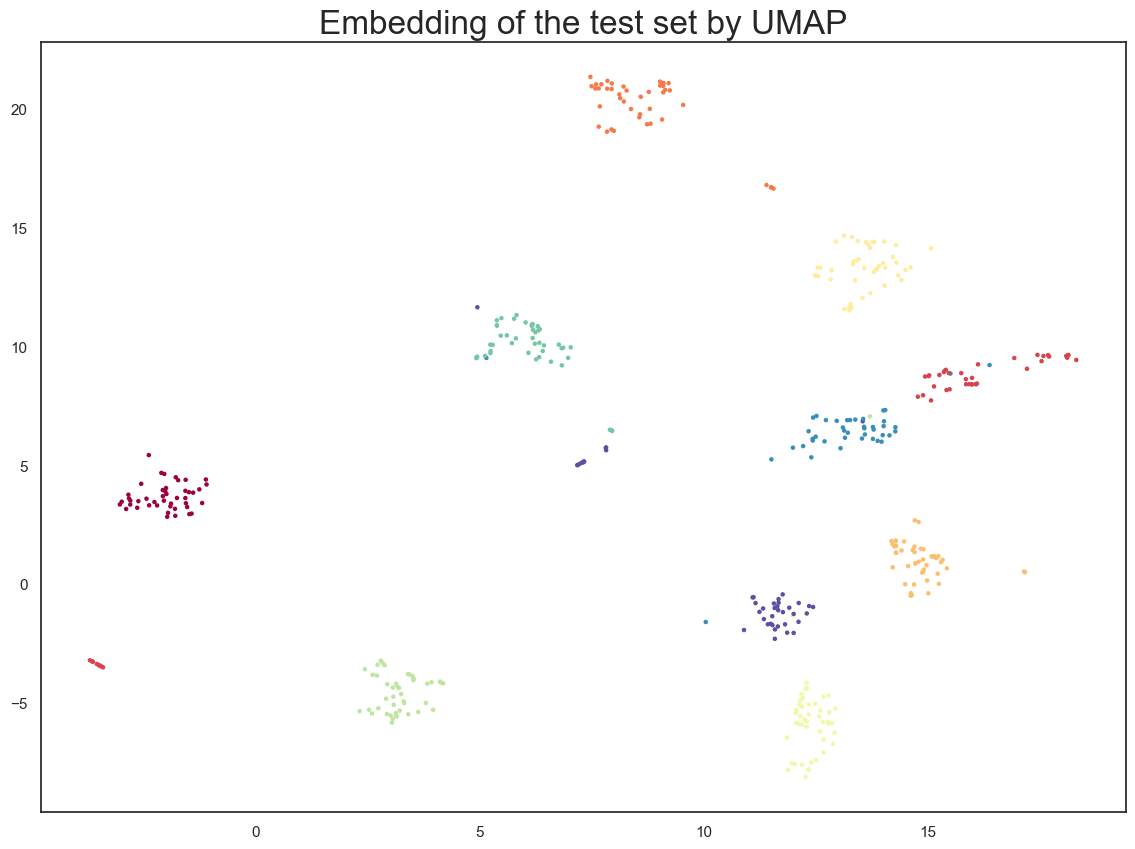

In [18]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s= 5, c=y_test, cmap='Spectral')
plt.title('Embedding of the test set by UMAP', fontsize=24);

In [19]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)


(0.9666666666666667, 0.9822222222222222)

just for fun - running the same experiments - but this time reducing it down to 10 dimensions.

In [20]:
trans = umap.UMAP(n_neighbors=5, n_components=10, random_state=42).fit(X_train)

c:\Users\blais\Documents\ML\venv2\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [21]:
svc = SVC().fit(trans.embedding_, y_train)
knn = KNeighborsClassifier().fit(trans.embedding_, y_train)

In [22]:
svc.score(trans.transform(X_test), y_test), knn.score(trans.transform(X_test), y_test)

(0.9733333333333334, 0.9822222222222222)